In [92]:
import os
#os.environ["MKL_THREADING_LAYER"]="GNU"
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 

In [ ]:
#TO DO
#define data as global variable
#use MPI for cluster

In [1]:
 # 15-Sep-2019
# Bo Milvang-Jensen
# Very rudimentary script to read+plot ...

import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import emcee
import george
from george import kernels

# Read photometry catalogue created by my other script
photfilename = 'F51_out_REMIR_ROS2.fits'
data = fits.getdata(photfilename, 1)

# The photometry catalogue contains aperture photometry in 25 different
# apertures. If we number them 0..24, they correspond to diameters 1..25 arcsec
apno = 10 # This is then 11 arcsec

# The photometry catalogue contains photometry for the AGN plus some more
# objects in the field, in this case the AGN + 6 more objetcs, so 7 in
# total. The AGN is number 1, and the others 2, 3, etc.
# This is seen in the column names, which end in _1, _2, etc.
# E.g. the column MAG_APER_1 contains the aperture magnitudes (for all
# 25 apertures) for the AGN.

# Get the aperture magnitudes
##foo = data['MAG_APER_1'] # has shape e.g. (767, 25), the 25 being the apertures
mag_agn  = data['MAG_APER_1'][:,apno]
mag_ref1 = data['MAG_APER_3'][:,apno] # I have found that _3 is good here
mag_ref2 = data['MAG_APER_4'][:,apno]

# Get the differential magnitudes
delta_mag_agn_ref1 = mag_agn - mag_ref1
delta_mag_ref2_ref1 = mag_ref2 - mag_ref1

# Get the magnitude errors 
magerr_agn = data['MAGERR_APER_1'][:,apno]
magerr_ref1 = data['MAGERR_APER_3'][:,apno]
magerr_ref2= data['MAGERR_APER_4'][:,apno]

# TODO Here I could loop over the filters, subtracting the median

# For simplicity "extract" some arrays from the data
filt = data['filter']
mjd_obs = data['mjd_obs']

# A simple plot of the J band differential mags, with the median subtracted
# Do 'H' and 'K' in the same way
maskJ = (filt == 'J')
#print(magerr_ref1[mask])
#plt.scatter(mjd_obs[mask], delta_mag_agn_ref1[mask]-np.median(delta_mag_agn_ref1[mask]))
plt.errorbar(mjd_obs[maskJ], delta_mag_agn_ref1[maskJ]-np.median(delta_mag_agn_ref1[maskJ]), magerr_ref1[maskJ],fmt='b.')
plt.title('test')
plt.xlabel('MJD-OBS')
plt.ylabel('delta mag')
plt.show()

<Figure size 640x480 with 1 Axes>

In [101]:
#J band data
xJ=np.asarray(mjd_obs[maskJ], dtype=float)
nJ=len(xJ)
XJ = np.reshape(xJ,(nJ,1))
yJ=np.asarray(delta_mag_agn_ref1[maskJ]-np.median(delta_mag_agn_ref1[maskJ]), dtype=float)
yJerr = np.array(magerr_ref1[maskJ], dtype=float)

#H band data
maskH = (filt == 'H')

xHtemp=np.asarray(mjd_obs[maskH], dtype=float)
xH=np.delete(xHtemp,(1,2))
nH=len(xH)
XH = np.reshape(xH,(nH,1))
XH_new=np.linspace(min(XH),max(XH),100,dtype=np.float64)

Hdelta_mag_agn_ref1=np.delete(delta_mag_agn_ref1[maskH],(1,2))
yH=np.asarray(Hdelta_mag_agn_ref1-np.median(Hdelta_mag_agn_ref1), dtype=float)
yHerrtemp = np.asarray(magerr_ref1[maskH], dtype=float)
yHerr=np.delete(yHerrtemp,(1,2))

#K band data
maskK = (filt == 'K')
xK=np.asarray(mjd_obs[maskK], dtype=float)
nK=len(xK)
XK = np.reshape(xK,(nK,1))
yK=np.asarray(delta_mag_agn_ref1[maskK]-np.median(delta_mag_agn_ref1[maskK]), dtype=float)
yKerr = np.asarray(magerr_ref1[maskK], dtype=float)

#g band data
maskg = (filt == 'g')
gtemp=delta_mag_agn_ref1[maskg]
gisnan=~np.isnan(gtemp)
xg=np.asarray(mjd_obs[maskg][gisnan], dtype=float)
ng=len(xg)
Xg = np.reshape(xg,(ng,1))
yg=np.asarray(delta_mag_agn_ref1[maskg][gisnan]-np.median(delta_mag_agn_ref1[maskg][gisnan]), dtype=float)
ygerr = np.asarray(magerr_ref1[maskg][gisnan], dtype=float)
#remove values under -1 
xg=xg[yg>-1]
ng=len(xg)
Xg = np.reshape(xg,(ng,1))
ygerr=ygerr[yg>-1]
yg=yg[yg>-1]
#r band data
maskr = (filt == 'r')
rtemp=delta_mag_agn_ref1[maskr]
risnan=~np.isnan(rtemp)
xr=np.asarray(mjd_obs[maskr][risnan], dtype=float)
nr=len(xr)
Xr = np.reshape(xr,(nr,1))
yr=np.asarray(delta_mag_agn_ref1[maskr][risnan]-np.median(delta_mag_agn_ref1[maskr][risnan]), dtype=float)
yrerr = np.asarray(magerr_ref1[maskr][risnan], dtype=float)

#i band data
maski = (filt == 'i')
itemp=delta_mag_agn_ref1[maski]
iisnan=~np.isnan(itemp)
xi=np.asarray(mjd_obs[maski][iisnan], dtype=float)
ni=len(xi)
Xi = np.reshape(xi,(ni,1))
yi=np.asarray(delta_mag_agn_ref1[maski][iisnan]-np.median(delta_mag_agn_ref1[maski][iisnan]), dtype=float)
yierr = np.asarray(magerr_ref1[maski][iisnan], dtype=float)

#z band data
maskz = (filt == 'z')
ztemp=delta_mag_agn_ref1[maskz]
zisnan=~np.isnan(ztemp)
xz=np.asarray(mjd_obs[maskz][zisnan], dtype=float)
nz=len(xz)
Xz = np.reshape(xz,(nz,1))
yz=np.asarray(delta_mag_agn_ref1[maskz][zisnan]-np.median(delta_mag_agn_ref1[maskz][zisnan]), dtype=float)
yzerr = np.asarray(magerr_ref1[maskz][zisnan], dtype=float)

#time array with all bands
#be carefull with how XJ and xj acts 
X_tot= np.concatenate((xJ,xH,xK,xg,xr,xi,xz),axis=None)
X_tot=np.reshape(X_tot,(len(X_tot),1))

#combine all y values for guess
Y_tot= np.concatenate((yJ,yH,yK),axis=None)
yg[yg>-1]

#time delay array
ntau=1000
tau=np.linspace(1.0,1000.0,ntau)

In [114]:
#Interpolation function used in model to obtain comparison points with data 
def interpolate(x0, y0, x):
    x = np.array(x)

    idx = np.searchsorted(x0, x)
    dl = np.array(x - x0[idx - 1])
    dr = np.array(x0[idx] - x)
    d = dl + dr
    wl = dr / d

    return wl * y0[idx - 1] + (1 - wl) * y0[idx]

In [153]:
ngp = 1000
Xgp = np.linspace(min(X_tot), max(X_tot), ngp)
Xgp = Xgp.reshape(len(Xgp))
mu = np.zeros(ngp)+0.01

In [1]:
def log_likelihood(theta, tau, Xgp, mu, xJ,xH,xK,xg,xr,xi,xz,yJ,yK,yH,yg,yr,yi,yz,yJerr,yKerr,yHerr,ygerr,yrerr,yierr,yzerr):
    (sigma_DT, m_DT, theta_DT, 
     Jsigma_AD, Jm_AD, Jtheta_AD,
     Hsigma_AD, Hm_AD, Htheta_AD,
     Ksigma_AD, Km_AD, Ktheta_AD,
     gsigma_AD, gm_AD, gtheta_AD,
     rsigma_AD, rm_AD, rtheta_AD,
     isigma_AD, im_AD, itheta_AD,
     zsigma_AD, zm_AD, ztheta_AD,
     T, K_0, index, η, ℓ)= theta
    
    gp=george.GP(η**2*kernels.ExpKernel(ℓ))
    gp.compute(Xgp)
    mu, cov = gp.predict(mu,Xgp)
    
    #Different wavelength for different bands, not a free paramter 
    #REMIR filters in nm
    Jwav = 1250.0
    Hwav = 1625.0
    Kwav = 2150.0
    #Sloan filters for ROSS2 in nm
    gwav = 475.4
    rwav = 620.4
    iwav = 769.8
    zwav = 966.5

    #Define constants 
    wav_0 = 1122.4#Reference wavelength in nm, use 500?
    h = 6.626e-34#Plancks constant in J*s
    c = 299792458.0#speed of light in m/s
    k = 1.38e-23#Boltzmanns constant in J/K
    
    #Peak Black Body from uniform torus temperature
    wav_peak = 2.898*10**6/T
    b_max = 4.967#h*c/(1e-9*wav_peak*k*T)
    BB_max = 1.0/( (wav_peak**5) * (np.exp(b_max) - 1.0) )
    
    #Universal lognormal for Dusty Torus 
    exp_DT = -((np.log((tau-theta_DT)/np.exp(m_DT)))**2/(2*sigma_DT**2)) 
    front_DT = 1.0/((tau-theta_DT)*sigma_DT*np.sqrt(2*np.pi))
    lognorm_DT = front_DT*np.exp(exp_DT)
    where_are_NaNsDT = np.isnan(lognorm_DT)
    lognorm_DT[where_are_NaNsDT] = 0.0
    
    #Dusty Torus transfer equation for J band
    Jb = h*c/(1e-9*Jwav*k*T)
    JBB = (1.0/( Jwav**5 * (np.exp(Jb) - 1.0) ))/BB_max
    JPsi_DT = JBB*lognorm_DT
    #Dusty Torus transfer equation for H band
    Hb = h*c/(1e-9*Hwav*k*T)
    HBB = (1.0/( Hwav**5 * (np.exp(Hb) - 1.0) ))/BB_max
    HPsi_DT = HBB*lognorm_DT
    #Dusty Torus transfer equation for K band
    Kb = h*c/(1e-9*Kwav*k*T)
    KBB = (1.0/( Kwav**5 * (np.exp(Kb) - 1.0) ))/BB_max
    KPsi_DT = KBB*lognorm_DT
    #Dusty Torus transfer equation for g band
    gb = h*c/(1e-9*gwav*k*T)
    gBB = (1.0/( gwav**5 * (np.exp(gb) - 1.0) ))/BB_max
    gPsi_DT = gBB*lognorm_DT   
    #Dusty Torus transfer equation for r band
    rb = h*c/(1e-9*rwav*k*T)
    rBB = (1.0/( rwav**5 * (np.exp(rb) - 1.0) ))/BB_max
    rPsi_DT = rBB*lognorm_DT
    #Dusty Torus transfer equation for i band
    ib = h*c/(1e-9*iwav*k*T)
    iBB = (1.0/( iwav**5 * (np.exp(ib) - 1.0) ))/BB_max
    iPsi_DT = iBB*lognorm_DT
    #Dusty Torus transfer equation for z band
    zb = h*c/(1e-9*zwav*k*T)
    zBB = (1.0/( zwav**5 * (np.exp(zb) - 1.0) ))/BB_max
    zPsi_DT = zBB*lognorm_DT
    
    #Accretion Disk transfer equation for the J band
    Jpowr = K_0*(Jwav/wav_0)**(index)    
    Jexp_AD = -((np.log((tau-Jtheta_AD)/np.exp(Jm_AD)))**2/(2*Jsigma_AD**2))
    Jfront_AD = 1.0/((tau-Jtheta_AD)*Jsigma_AD*np.sqrt(2*np.pi))
    Jlognorm_AD = Jfront_AD*np.exp(Jexp_AD)
    Jwhere_are_NaNs = np.isnan(Jlognorm_AD)
    Jlognorm_AD[Jwhere_are_NaNs] = 0.0
    JPsi_AD = Jpowr*Jlognorm_AD
    #Accretion Disk transfer equation for the H band
    Hpowr = K_0*(Hwav/wav_0)**(index)    
    Hexp_AD = -((np.log((tau-Htheta_AD)/np.exp(Hm_AD)))**2/(2*Hsigma_AD**2))
    Hfront_AD = 1.0/((tau-Htheta_AD)*Hsigma_AD*np.sqrt(2*np.pi))
    Hlognorm_AD = Hfront_AD*np.exp(Hexp_AD)
    Hwhere_are_NaNs = np.isnan(Hlognorm_AD)
    Hlognorm_AD[Hwhere_are_NaNs] = 0.0
    HPsi_AD = Hpowr*Hlognorm_AD
    #Accretion Disk transfer equation for the K band
    Kpowr = K_0*(Kwav/wav_0)**(index)    
    Kexp_AD = -((np.log((tau-Ktheta_AD)/np.exp(Km_AD)))**2/(2*Ksigma_AD**2))
    Kfront_AD = 1.0/((tau-Ktheta_AD)*Ksigma_AD*np.sqrt(2*np.pi))
    Klognorm_AD = Kfront_AD*np.exp(Kexp_AD)
    Kwhere_are_NaNs = np.isnan(Klognorm_AD)
    Klognorm_AD[Kwhere_are_NaNs] = 0.0
    KPsi_AD = Kpowr*Klognorm_AD
    #Accretion Disk transfer equation for the g band
    gpowr = K_0*(gwav/wav_0)**(index)    
    gexp_AD = -((np.log((tau-gtheta_AD)/np.exp(gm_AD)))**2/(2*gsigma_AD**2))
    gfront_AD = 1.0/((tau-gtheta_AD)*gsigma_AD*np.sqrt(2*np.pi))
    glognorm_AD = gfront_AD*np.exp(gexp_AD)
    gwhere_are_NaNs = np.isnan(glognorm_AD)
    glognorm_AD[gwhere_are_NaNs] = 0.0
    gPsi_AD = gpowr*glognorm_AD
    #Accretion Disk transfer equation for the r band
    rpowr = K_0*(rwav/wav_0)**(index)    
    rexp_AD = -((np.log((tau-rtheta_AD)/np.exp(rm_AD)))**2/(2*rsigma_AD**2))
    rfront_AD = 1.0/((tau-rtheta_AD)*rsigma_AD*np.sqrt(2*np.pi))
    rlognorm_AD = rfront_AD*np.exp(rexp_AD)
    rwhere_are_NaNs = np.isnan(rlognorm_AD)
    rlognorm_AD[rwhere_are_NaNs] = 0.0
    rPsi_AD = rpowr*rlognorm_AD
    #Accretion Disk transfer equation for the i band
    ipowr = K_0*(iwav/wav_0)**(index)    
    iexp_AD = -((np.log((tau-itheta_AD)/np.exp(im_AD)))**2/(2*isigma_AD**2))
    ifront_AD = 1.0/((tau-itheta_AD)*isigma_AD*np.sqrt(2*np.pi))
    ilognorm_AD = ifront_AD*np.exp(iexp_AD)
    iwhere_are_NaNs = np.isnan(ilognorm_AD)
    ilognorm_AD[iwhere_are_NaNs] = 0.0
    iPsi_AD = ipowr*ilognorm_AD
    #Accretion Disk transfer equation for the z band
    zpowr = K_0*(zwav/wav_0)**(index)    
    zexp_AD = -((np.log((tau-ztheta_AD)/np.exp(zm_AD)))**2/(2*zsigma_AD**2))
    zfront_AD = 1.0/((tau-ztheta_AD)*zsigma_AD*np.sqrt(2*np.pi))
    zlognorm_AD = zfront_AD*np.exp(zexp_AD)
    zwhere_are_NaNs = np.isnan(zlognorm_AD)
    zlognorm_AD[zwhere_are_NaNs] = 0.0
    zPsi_AD = zpowr*zlognorm_AD
    
    #Full transfer equations
    Jtransfer = JPsi_DT + JPsi_AD
    Htransfer = HPsi_DT + HPsi_AD
    Ktransfer = KPsi_DT + KPsi_AD
    gtransfer = gPsi_DT + gPsi_AD
    rtransfer = rPsi_DT + rPsi_AD
    itransfer = iPsi_DT + iPsi_AD
    ztransfer = zPsi_DT + zPsi_AD
    
    #convolutions and interpolations
    Jconvol=np.convolve(Jtransfer, mu,'same')
    Jcomp=interpolate(Xgp,Jconvol,XJ)
    Hconvol=np.convolve(Htransfer, mu,'same')
    Hcomp=interpolate(Xgp,Hconvol,XH)                     
    Kconvol=np.convolve(Ktransfer, mu,'same')
    Kcomp=interpolate(Xgp,Kconvol,XK)
    gconvol=np.convolve(gtransfer, mu,'same')
    gcomp=interpolate(Xgp,gconvol,Xg)
    rconvol=np.convolve(rtransfer, mu,'same')
    rcomp=interpolate(Xgp,rconvol,Xr)
    iconvol=np.convolve(itransfer, mu,'same')
    icomp=interpolate(Xgp,iconvol,Xi)
    zconvol=np.convolve(ztransfer, mu,'same')
    zcomp=interpolate(Xgp,zconvol,Xz)
    
    like = (-0.5 * np.sum((yJ - Jcomp) ** 2 / yJerr + np.log(k*yJerr)) -
            0.5 * np.sum((yH - Jcomp) ** 2 / yHerr + np.log(k*yHerr)) -
            0.5 * np.sum((yK - Jcomp) ** 2 / yKerr + np.log(k*yKerr)) -
            0.5 * np.sum((yg - Jcomp) ** 2 / ygerr + np.log(k*ygerr)) -
            0.5 * np.sum((yr - Jcomp) ** 2 / yrerr + np.log(k*yrerr)) -
            0.5 * np.sum((yi - Jcomp) ** 2 / yierr + np.log(k*yierr)) -
            0.5 * np.sum((yz - Jcomp) ** 2 / yzerr + np.log(k*yzerr)))
    return like

In [155]:
def lnprior(theta):
    (sigma_DT, m_DT, theta_DT, 
     Jsigma_AD, Jm_AD, Jtheta_AD,
     Hsigma_AD, Hm_AD, Htheta_AD,
     Ksigma_AD, Km_AD, Ktheta_AD,
     gsigma_AD, gm_AD, gtheta_AD,
     rsigma_AD, rm_AD, rtheta_AD,
     isigma_AD, im_AD, itheta_AD,
     zsigma_AD, zm_AD, ztheta_AD,
     T, K_0, index, η, ℓ)= theta
    
    mmu=3.91202300543
    msig=3.91202300543
    mlow=10.0
    mhigh=100.0
    sigmu=2.0
    sigsig=1.0
    siglow=1.0
    sighigh=3.0
    tlow=-10.0
    thigh=10.0
    if (siglow < sigma_DT < sighigh  and mlow < m_DT < mhigh and 0.0 < theta_DT < 1000.0 and 
        siglow < Jsigma_AD < sighigh  and mlow < Jm_AD < mhigh and tlow < Jtheta_AD < thigh and
        siglow < Hsigma_AD < sighigh  and mlow < Hm_AD < mhigh and tlow < Htheta_AD < thigh and
        siglow < Ksigma_AD < sighigh  and mlow < Km_AD < mhigh and tlow < Ktheta_AD < thigh and
        siglow < gsigma_AD < sighigh  and mlow < gm_AD < mhigh and tlow < gtheta_AD < thigh and
        siglow < rsigma_AD < sighigh  and mlow < rm_AD < mhigh and tlow < rtheta_AD < thigh and
        siglow < isigma_AD < sighigh  and mlow < im_AD < mhigh and tlow < itheta_AD < thigh and
        siglow < zsigma_AD < sighigh  and mlow < zm_AD < mhigh and tlow < ztheta_AD < thigh and
        1000.0 < T < 2300.0 and 0.01 < K_0 < 10.0 and 1.0 < index < 2.0 and 
        0.01 < η < 1.0 and 0.01 < ℓ < 10.0):
        return 0.0
    return -np.inf

In [156]:
def lnprob(theta, tau, Xgp, mu, xJ,xH,xK,xg,xr,xi,xz,yJ,yK,yH,yg,yr,yi,yz,yJerr,yKerr,yHerr,ygerr,yrerr,yierr,yzerr):
    lp = lnprior(theta)
    return lp + log_likelihood(theta, tau, Xgp, mu, xJ,xH,xK,xg,xr,xi,xz,yJ,yK,yH,yg,yr,yi,yz,yJerr,yKerr,yHerr,ygerr,yrerr,yierr,yzerr) if np.isfinite(lp) else -np.inf

In [82]:
from scipy.optimize import minimize

sigma_DT_val=1.18
Jsigma_AD_val=1.18
m_DT_val=37.5
Jm_AD_val=37.5
theta_DT_val=500.0
Jtheta_AD_val=5.0
T_val=1400.0
K_0_val=5.0
index_val=1.5
η_val=0.5
ℓ_val=0.5
k_val=1.5
param=12

#sigma_DT, Jsigma_AD, mu_DT, Jmu_AD, theta_DT, Jtheta_AD, T, K_0, index, η_val, ℓ_val= theta

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([sigma_DT_val, Jsigma_AD_val, m_DT_val, Jm_AD_val, theta_DT_val, Jtheta_AD_val, T_val, K_0_val, index_val, η_val, ℓ_val, k_val]) + 0.1*np.random.randn(param)

soln = minimize(nll, initial, args=(tau, Xgp, mu, xJ, yJ, yJerr))

sigma_DT_ml, Jsigma_AD_ml, m_DT_ml, Jm_AD_ml, theta_DT_ml, Jtheta_AD_ml, T_ml, K_0_ml, index_ml, η_ml, ℓ_ml, k_ml = soln.x

print("Maximum likelihood estimates:")
print(soln.x)

/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/george/metrics.py:103: RuntimeWarning: invalid value encountered in log
  parameters.append(np.log(metric))


ValueError: array must not contain infs or NaNs

In [161]:
initial = np.array([2.0,50.0,500.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   1400,1.0,1.5,0.2,0.5])
lnprob(initial, tau, Xgp, mu, xJ,xH,xK,xg,xr,xi,xz,yJ,yK,yH,yg,yr,yi,yz,yJerr,yKerr,yHerr,ygerr,yrerr,yierr,yzerr)
#log_likelihood(initial, tau, Xgp, mu ,xJ, yJ, yJerr)
#lnprior(initial)

/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide


805328.6580872079

In [145]:
from multiprocessing import Pool

In [ ]:
nwalkers = 100

initial = np.array([2.0,50.0,500.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   2.0,50.0,0.0,
                   1400,1.0,1.5,0.2,0.5])
ndim = len(initial)
p0 = [np.array(initial) + 1e-4 * np.random.randn(ndim)
      for i in range(nwalkers)]
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(tau, Xgp, mu, xJ,xH,xK,xg,xr,xi,xz,yJ,yK,yH,yg,yr,yi,yz,yJerr,yKerr,yHerr,ygerr,yrerr,yierr,yzerr),pool=pool)
    sampler.run_mcmc(p0, 20000, progress=True);
#print("Running first burn-in...")
#p = p0[np.argmax(lnprob)]
#sampler.reset()

# Re-sample the walkers near the best walker from the previous burn-in.
#p0 = [p + 1e-8 * np.random.randn(ndim) for i in range(nwalkers)]
#p0, _, _ = sampler.run_mcmc(p0, 250)

#print("Running second burn-in...")
#p0, _, _ = sampler.run_mcmc(p0, 250)
#sampler.reset()

#print("Running production...")
#sampler.run_mcmc(p0, 1000)

/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
/home/malte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log


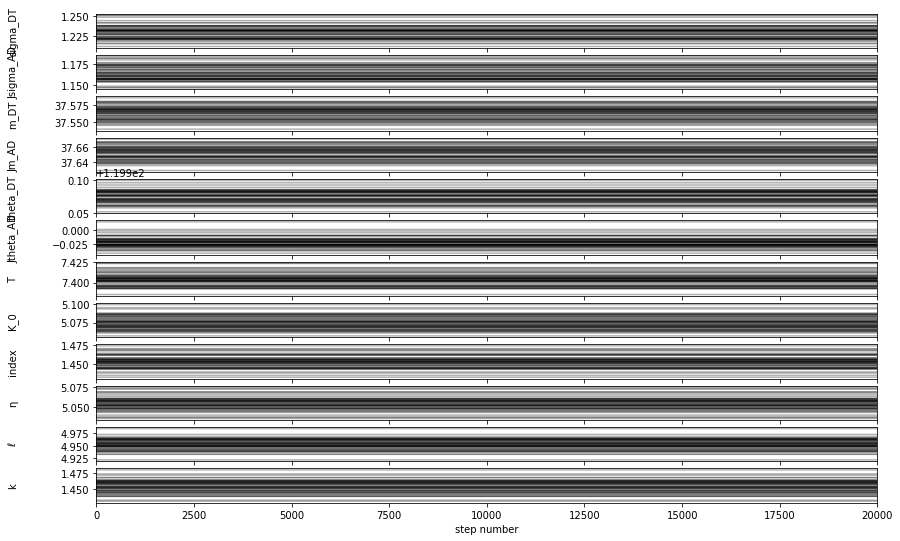

In [37]:
fig, axes = plt.subplots(12, figsize=(14, 9), sharex=True)
samples = sampler.get_chain()
labels = ['sigma_DT', 'Jsigma_AD', 'm_DT', 'Jm_AD', 'theta_DT', 'Jtheta_AD', 'T', 'K_0', 'index', 'η', 'ℓ', 'k']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [301]:
flat_samples = sampler.get_chain(discard=1200, thin=300, flat=True)
print(flat_samples.shape)

(6200, 12)


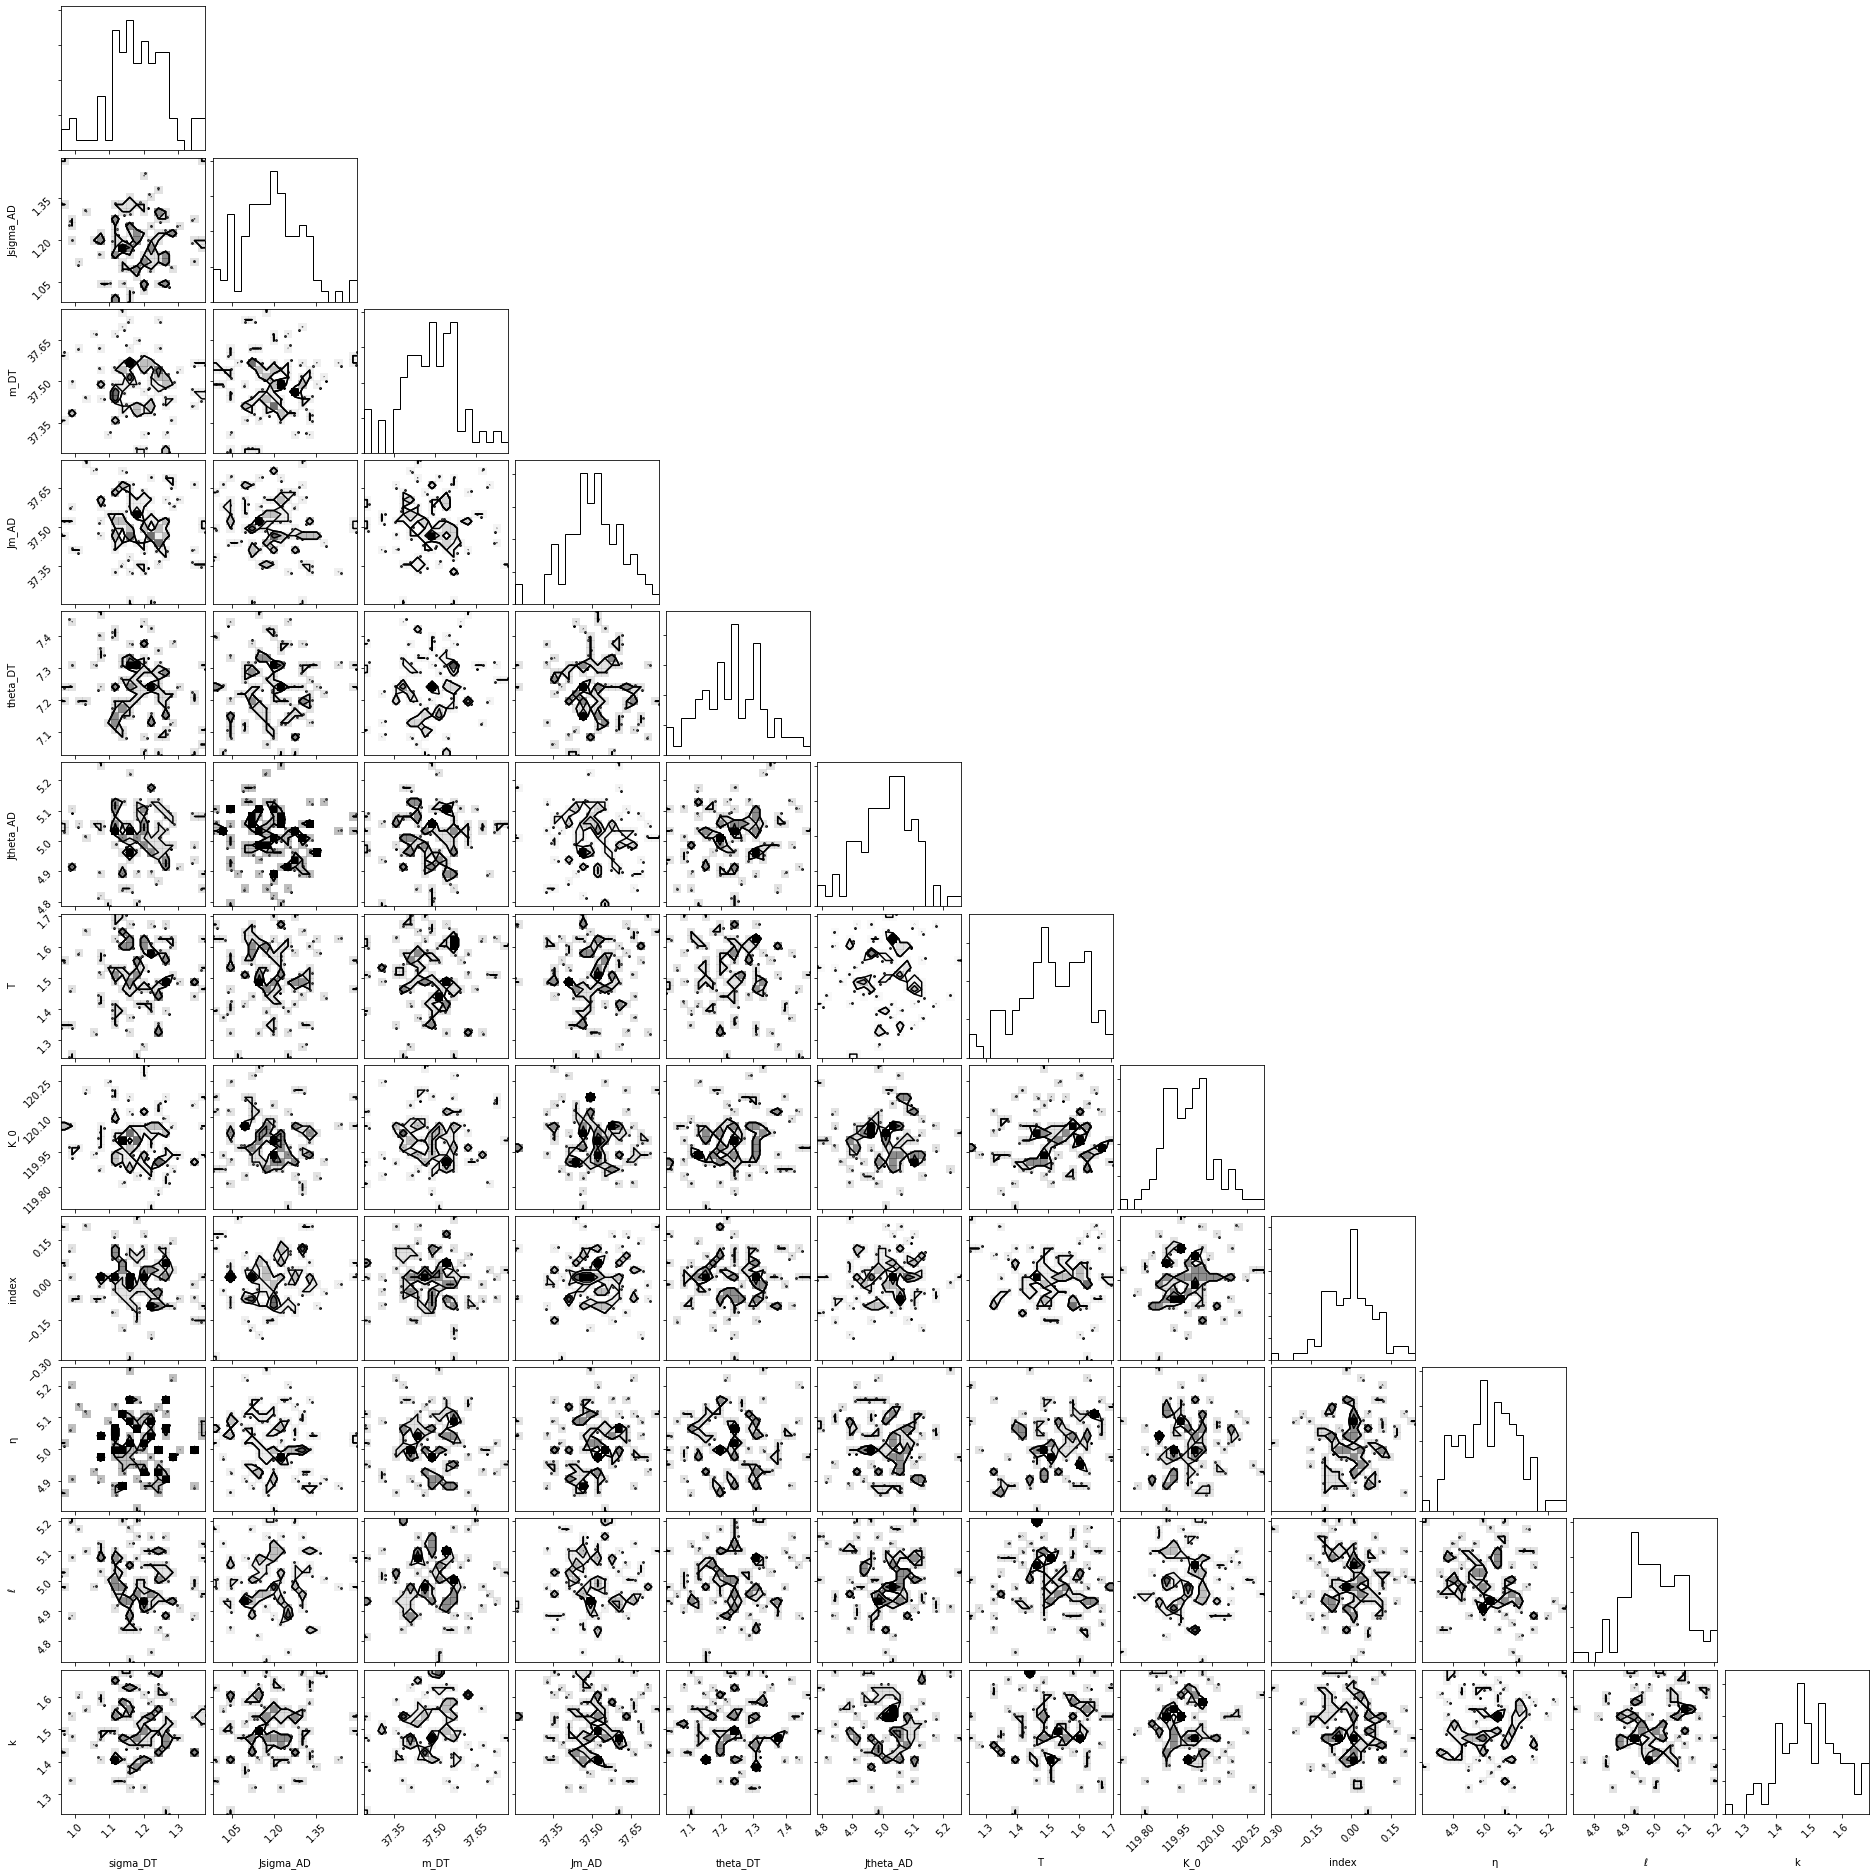

In [302]:
import corner

fig = corner.corner(
    flat_samples, labels=labels
);

In [320]:
yJ

array([-0.04021454, -0.04408264,  0.00086784, -0.03276062, -0.09445763,
       -0.11571121, -0.0334301 , -0.08233452, -0.09807587, -0.02315331,
       -0.02507591,  0.00783348, -0.05967522, -0.03184891, -0.05742645,
        0.00561142, -0.02413559, -0.02518654,  0.01398849,  0.        ,
        0.07386398,  0.09370232,  0.09769058,  0.05272102,  0.04765701,
        0.16421509,  0.0471611 ,  0.00388718, -0.02775383, -0.0708313 ,
       -0.12369347, -0.07772446, -0.09989738, -0.11494827, -0.09436607,
       -0.0891819 , -0.01688957,  0.04362106,  0.03388023,  0.06066322,
        0.11610603,  0.12976837,  0.23965454,  0.04725456,  0.04477501,
        0.0041008 ,  0.08264542,  0.02942657,  0.13908195])